In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nircoloring.evaluation.utils import *
from nircoloring.evaluation.config import *

# Create CycleGAN Result Dataset for IIS 

In [3]:
DATASET_DIR = join(ROOT_DIR, "data/dataset/out/cycle-gan-serengeti-incandescent-large")
os.makedirs(DATASET_DIR, exist_ok=True)

import numpy as np

filename: Path
for image, filename in zip(cycle_gan_serengeti_night_large_test.load_images(),
                           cycle_gan_serengeti_night_large_test.image_filenames):
    image = image.mean(axis=2).round().astype(np.uint8)
    image = np.stack([image, image, image], axis=2)
    pil_image = Image.fromarray(image)
    #pil_image.save(join(DATASET_DIR, filename.stem + ".png"))

# Analyze Results of IIS with CycleGAN Dataset

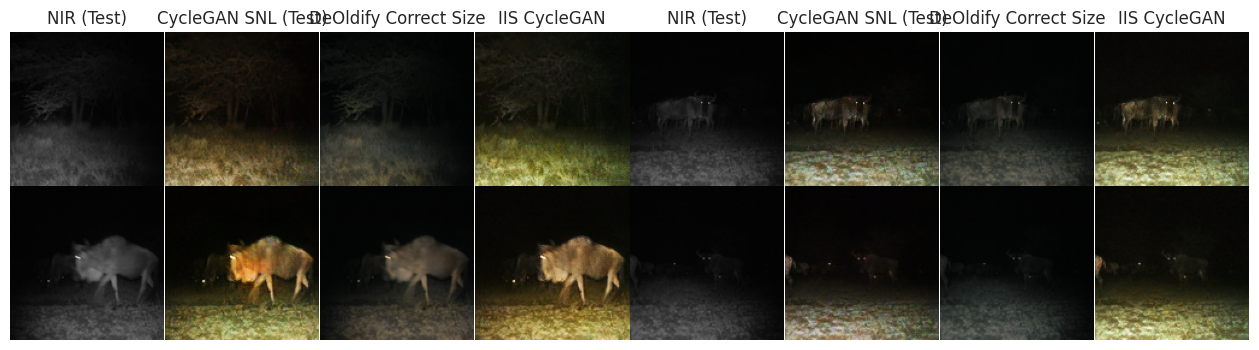

In [4]:
plot_grid(
    [serengeti_night_large_nir_test, cycle_gan_serengeti_night_large_test,
     deoldlify_correct_size_serengeti_night_large_test, iis_cycle_gan_serengeti_night_large_test],
    columns=2, rows=2)

In [5]:
tabular_definition, copy_function = plot_grid_latex(
    [serengeti_night_large_nir_test, cycle_gan_serengeti_night_large_test,
     deoldlify_correct_size_serengeti_night_large_test, iis_cycle_gan_serengeti_night_large_test],
    columns=1, rows=3,
    column_titles=["serengeti_night_large_nir_test", "cycle_gan_serengeti_night_large_test",
                   "deoldify_sernegeti_night_large_test", 
                   "iis_cycle_gan_serengeti_night_large_test"],
    fig_title="iis-cycle-gan-input")

print(tabular_definition)
copy_function()


\begin{tabularx}{\textwidth}{Y Y Y Y}
    serengeti_night_large_nir_test & cycle_gan_serengeti_night_large_test & deoldify_sernegeti_night_large_test & iis_cycle_gan_serengeti_night_large_test \\
    \includegraphics{gfx/iis-cycle-gan-input/serengeti_night_large_nir_test_S2_B06_R1_PICT0196.jpg} & \includegraphics{gfx/iis-cycle-gan-input/cycle_gan_serengeti_night_large_test_S2_B06_R1_PICT0196_fake.png} & \includegraphics{gfx/iis-cycle-gan-input/deoldify_sernegeti_night_large_test_S2_B06_R1_PICT0196.png} & \includegraphics{gfx/iis-cycle-gan-input/iis_cycle_gan_serengeti_night_large_test_S2_B06_R1_PICT0196_fake.png}\\
    \includegraphics{gfx/iis-cycle-gan-input/serengeti_night_large_nir_test_S2_B06_R3_PICT1370.jpg} & \includegraphics{gfx/iis-cycle-gan-input/cycle_gan_serengeti_night_large_test_S2_B06_R3_PICT1370_fake.png} & \includegraphics{gfx/iis-cycle-gan-input/deoldify_sernegeti_night_large_test_S2_B06_R3_PICT1370.png} & \includegraphics{gfx/iis-cycle-gan-input/iis_cycle_gan_serenge

In [6]:
result_to_quan_df([
    cycle_gan_serengeti_night_large_test,
    iis_cycle_gan_serengeti_night_large_test,
    deoldlify_correct_size_serengeti_night_large_test,
    iis_serengeti_night_large_test
])

/home/ayk/miniforge3/envs/nir-coloring/lib/python3.9/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
Evaluating nrqm: 100%|██████████| 4/4 [15:06<00:00, 226.52s/it]


,NIQE,NRQM,FID
CycleGAN SNL (Test),14.058509,5.452130,74.150844
IIS CycleGAN,13.466723,5.473359,69.681565
DeOldify Correct Size,17.927709,4.406037,104.066262
IIS SNL,14.083268,4.928783,86.674068
